<a href="https://colab.research.google.com/github/Heterotic-Research/sns-phc-303/blob/main/psd_lif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

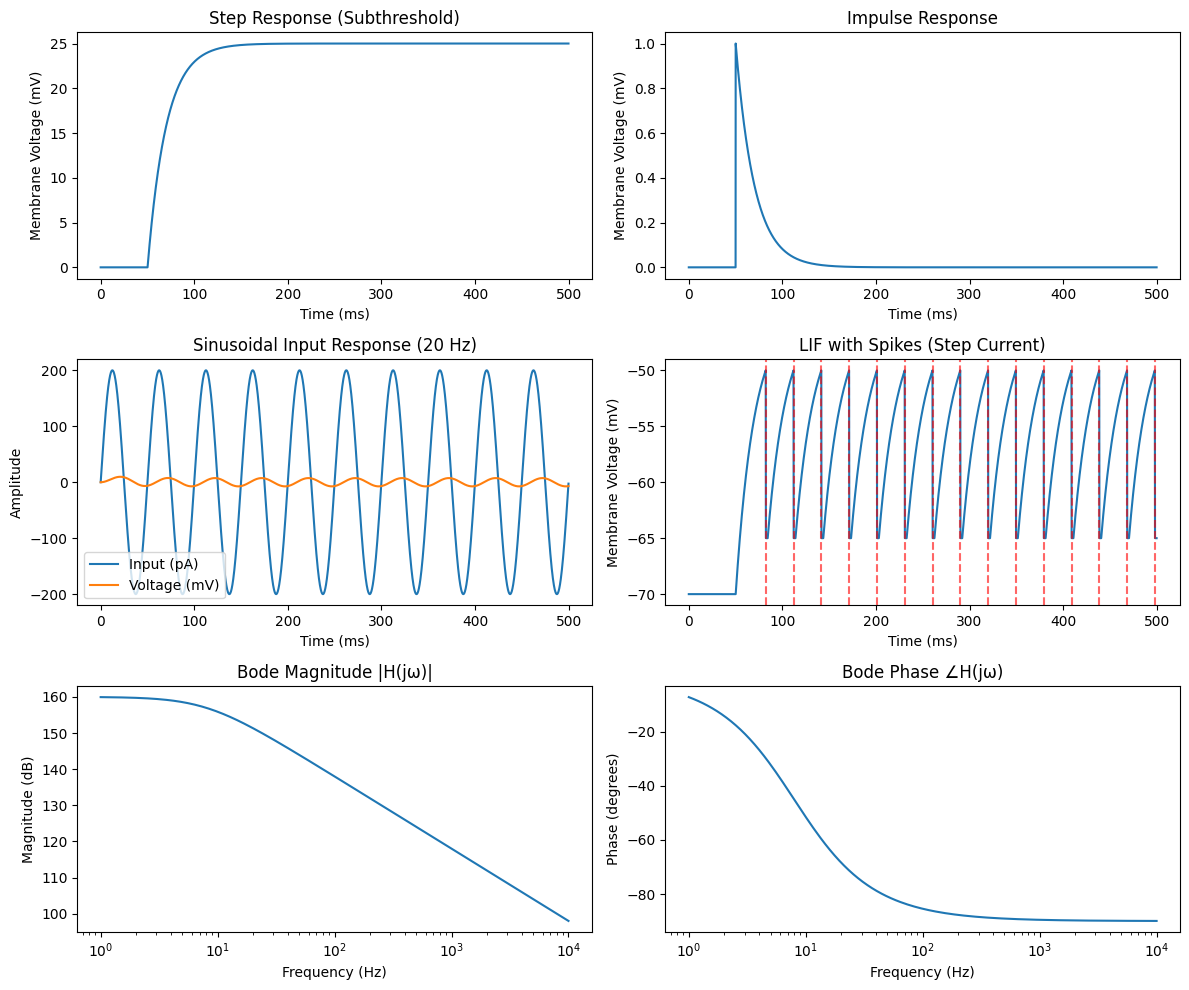

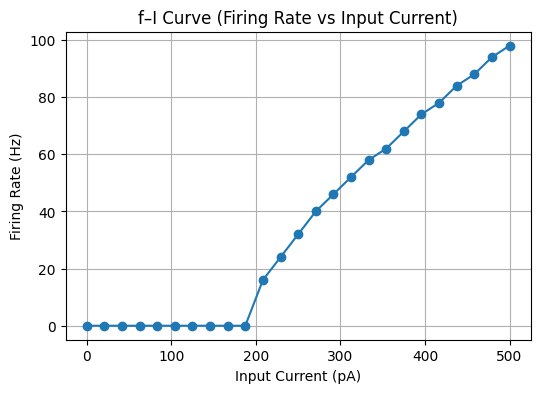

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# LIF neuron parameters
# -------------------------------
C = 200e-12         # Capacitance (F)
R = 100e6           # Resistance (Ohm)
tau_m = R * C       # Membrane time constant (s)
E_L = -70e-3        # Leak reversal (V)
V_th = -50e-3       # Threshold (V)
V_reset = -65e-3    # Reset potential (V)
t_ref = 2e-3        # Refractory period (s)

# Simulation parameters
dt = 1e-4           # Time step (s)
T = 0.5             # Total time (s)
t = np.arange(0, T, dt)

# -------------------------------
# Input currents
# -------------------------------
I_step = 250e-12 * (t > 0.05)      # Step current after 50 ms
I_impulse = np.zeros_like(t)
I_impulse[500] = 2e-9              # Impulse at 50 ms
I_sine = 200e-12 * np.sin(2 * np.pi * 20 * t)  # 20 Hz sine wave

# Choose input for spiking simulation
I_in = I_step

# -------------------------------
# Subthreshold LIF dynamics
# -------------------------------
def lif_subthreshold(I, tau_m, R, v0=0):
    """Simulate subthreshold membrane potential response (no spikes)."""
    v = np.zeros_like(I)
    v[0] = v0
    for i in range(1, len(I)):
        dv = (-v[i-1] + R*I[i-1]) * (dt / tau_m)
        v[i] = v[i-1] + dv
    return v

v_step = lif_subthreshold(I_step, tau_m, R)
v_impulse = lif_subthreshold(I_impulse, tau_m, R)
v_sine = lif_subthreshold(I_sine, tau_m, R)

# -------------------------------
# LIF with threshold and reset
# -------------------------------
def lif_spiking(I, tau_m, R, E_L, V_th, V_reset, t_ref):
    v = np.zeros_like(I)
    v[0] = E_L
    spike_times = []
    refrac_time = 0
    for i in range(1, len(I)):
        if refrac_time > 0:
            v[i] = V_reset
            refrac_time -= dt
            continue
        dv = (-(v[i-1]-E_L) + R*I[i-1]) * (dt / tau_m)
        v[i] = v[i-1] + dv
        if v[i] >= V_th:
            v[i] = V_reset
            spike_times.append(t[i])
            refrac_time = t_ref
    return v, spike_times

v_spike, spikes = lif_spiking(I_in, tau_m, R, E_L, V_th, V_reset, t_ref)

# -------------------------------
# Frequency response (Bode plot)
# -------------------------------
omega = np.logspace(0, 4, 200) * 2 * np.pi  # 1 Hz – 10 kHz
H = R / (1 + 1j * omega * tau_m)
mag = np.abs(H)
phase = np.angle(H, deg=True)

# -------------------------------
# Plot results
# -------------------------------
plt.figure(figsize=(12, 10))

# Step response
plt.subplot(3, 2, 1)
plt.plot(t*1e3, v_step*1e3)
plt.title("Step Response (Subthreshold)")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Voltage (mV)")

# Impulse response
plt.subplot(3, 2, 2)
plt.plot(t*1e3, v_impulse*1e3)
plt.title("Impulse Response")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Voltage (mV)")

# Sinusoidal response
plt.subplot(3, 2, 3)
plt.plot(t*1e3, I_sine*1e12, label="Input (pA)")
plt.plot(t*1e3, v_sine*1e3, label="Voltage (mV)")
plt.title("Sinusoidal Input Response (20 Hz)")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.legend()

# Spiking simulation
plt.subplot(3, 2, 4)
plt.plot(t*1e3, v_spike*1e3)
for s in spikes:
    plt.axvline(s*1e3, color='r', linestyle='--', alpha=0.6)
plt.title("LIF with Spikes (Step Current)")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Voltage (mV)")

# Bode magnitude
plt.subplot(3, 2, 5)
plt.semilogx(omega/(2*np.pi), 20*np.log10(mag))
plt.title("Bode Magnitude |H(jω)|")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")

# Bode phase
plt.subplot(3, 2, 6)
plt.semilogx(omega/(2*np.pi), phase)
plt.title("Bode Phase ∠H(jω)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (degrees)")

plt.tight_layout()
plt.show()

# -------------------------------
# F–I curve (optional)
# -------------------------------
def firing_rate(I0_array):
    rates = []
    for I0 in I0_array:
        I_drive = np.full_like(t, I0)
        _, spikes = lif_spiking(I_drive, tau_m, R, E_L, V_th, V_reset, t_ref)
        rates.append(len(spikes) / T)
    return rates

I_range = np.linspace(0, 500e-12, 25)
rates = firing_rate(I_range)

plt.figure(figsize=(6,4))
plt.plot(I_range*1e12, rates, 'o-')
plt.title("f–I Curve (Firing Rate vs Input Current)")
plt.xlabel("Input Current (pA)")
plt.ylabel("Firing Rate (Hz)")
plt.grid(True)
plt.show()


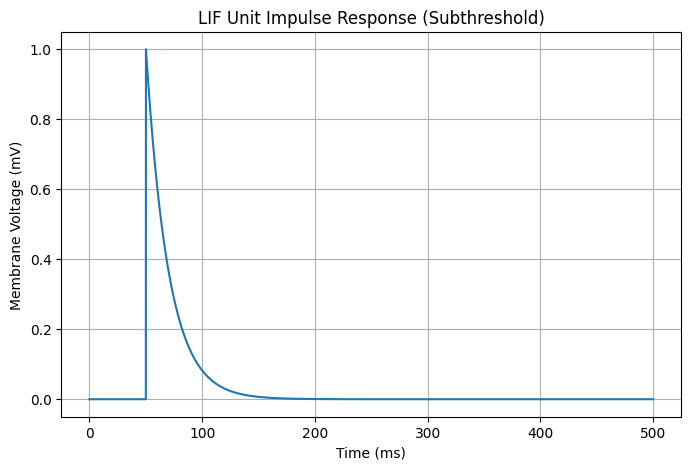

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 't' and 'v_impulse' are available from a previous cell
# If not, you would need to recalculate them here:
# dt = 1e-4
# T = 0.5
# t = np.arange(0, T, dt)
# R = 100e6
# C = 200e-12
# tau_m = R * C
# I_impulse = np.zeros_like(t)
# I_impulse[500] = 2e-9
#
# def lif_subthreshold(I, tau_m, R, v0=0):
#     v = np.zeros_like(I)
#     v[0] = v0
#     for i in range(1, len(I)):
#         dv = (-v[i-1] + R*I[i-1]) * (dt / tau_m)
#         v[i] = v[i-1] + dv
#     return v
#
# v_impulse = lif_subthreshold(I_impulse, tau_m, R)


plt.figure(figsize=(8, 5))
plt.plot(t*1e3, v_impulse*1e3)
plt.title("LIF Unit Impulse Response (Subthreshold)")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Voltage (mV)")
plt.grid(True)
plt.show()

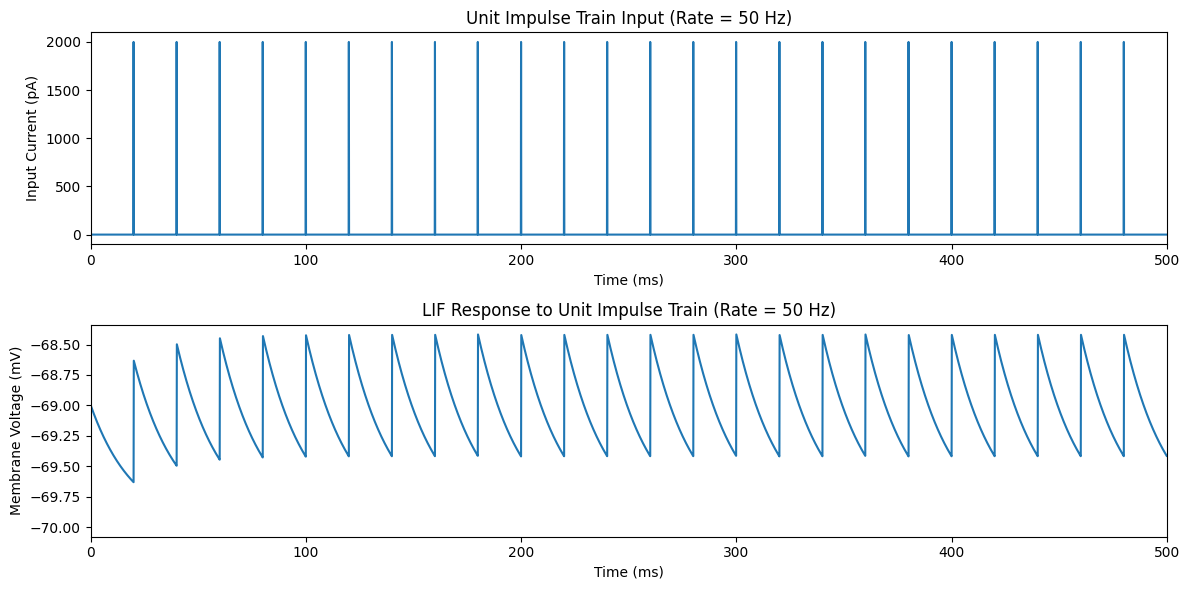

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming LIF neuron parameters and simulation parameters (dt, T, t) are available
# from previous cells. If not, they would need to be defined here.
# C = 200e-12         # Capacitance (F)
# R = 100e6           # Resistance (Ohm)
# tau_m = R * C       # Membrane time constant (s)
# E_L = -70e-3        # Leak reversal (V)
# V_th = -50e-3       # Threshold (V)
# V_reset = -65e-3    # Reset potential (V)
# t_ref = 2e-3        # Refractory period (s)
# dt = 1e-4           # Time step (s)
# T = 0.5             # Total time (s)
# t = np.arange(0, T, dt)

# Assuming the lif_spiking function is available from a previous cell.
# If not, it would need to be defined here.
# def lif_spiking(I, tau_m, R, E_L, V_th, V_reset, t_ref):
#     v = np.zeros_like(I)
#     v[0] = E_L
#     spike_times = []
#     refrac_time = 0
#     for i in range(1, len(I)):
#         if refrac_time > 0:
#             v[i] = V_reset
#             refrac_time -= dt
#             continue
#         dv = (-(v[i-1]-E_L) + R*I[i-1]) * (dt / tau_m)
#         v[i] = v[i-1] + dv
#         if v[i] >= V_th:
#             v[i] = V_reset
#             spike_times.append(t[i])
#             refrac_time = t_ref
#     return v, spike_times


# -------------------------------
# Unit impulse train response
# -------------------------------

# Define the rate of the impulse train (Hz)
r = 50  # Example rate: 50 Hz

# Generate a unit impulse train
I_impulse_train = np.zeros_like(t)
# Calculate the time interval between impulses
impulse_interval = 1.0 / r
# Find the indices where impulses should occur
impulse_indices = np.arange(0, T, impulse_interval) / dt
impulse_indices = impulse_indices.astype(int)
# Ensure indices are within the bounds of the time array
impulse_indices = impulse_indices[impulse_indices < len(t)]

# Set the impulse amplitude. We'll use a value that provides a noticeable response.
# The exact value might need adjustment depending on the desired effect.
impulse_amplitude = 2e-9 # Same amplitude as the single impulse used before

I_impulse_train[impulse_indices] = impulse_amplitude

# Simulate the LIF neuron response to the impulse train
v_impulse_train, spikes_impulse_train = lif_spiking(I_impulse_train, tau_m, R, E_L, V_th, V_reset, t_ref)

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t*1e3, I_impulse_train*1e12)
plt.title(f"Unit Impulse Train Input (Rate = {r} Hz)")
plt.xlabel("Time (ms)")
plt.ylabel("Input Current (pA)")
plt.xlim([0, T*1e3])


plt.subplot(2, 1, 2)
plt.plot(t*1e3, v_impulse_train*1e3)
for s in spikes_impulse_train:
    plt.axvline(s*1e3, color='r', linestyle='--', alpha=0.6)
plt.title(f"LIF Response to Unit Impulse Train (Rate = {r} Hz)")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Voltage (mV)")
plt.xlim([0, T*1e3])


plt.tight_layout()
plt.show()

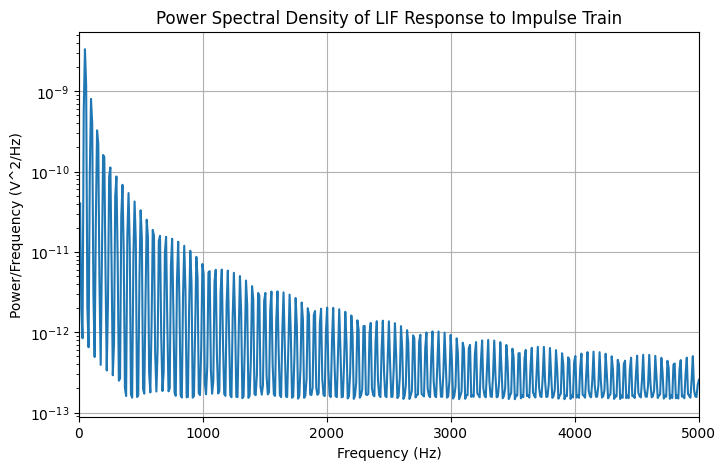


This plot shows how the power of the LIF neuron's voltage response is distributed across different frequencies.
Peaks in the PSD indicate dominant frequencies in the signal.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Assuming 't', 'v_impulse_train', and 'dt' are available from previous cells
# If not, you would need to recalculate them or load them here.

# -------------------------------
# Power Spectral Analysis of LIF Response
# -------------------------------

# Calculate the Power Spectral Density (PSD) using Welch's method
# nperseg: Length of each segment. Choosing a value that balances frequency resolution and variance.
# fs: Sampling frequency (1/dt)
f_welch, Pxx_welch = welch(v_impulse_train, fs=1/dt, nperseg=1024)

# Plot the Power Spectral Density
plt.figure(figsize=(8, 5))
plt.semilogy(f_welch, Pxx_welch)
plt.title("Power Spectral Density of LIF Response to Impulse Train")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency (V^2/Hz)")
plt.grid(True)
plt.xlim([0, 1/(2*dt)]) # Limit to Nyquist frequency
plt.show()

print("\nThis plot shows how the power of the LIF neuron's voltage response is distributed across different frequencies.")
print("Peaks in the PSD indicate dominant frequencies in the signal.")

# Optional: Direct method using the squared magnitude of the Fourier Transform
# freq_direct = np.fft.fftfreq(len(v_impulse_train), dt)
# Pxx_direct = (np.abs(np.fft.fft(v_impulse_train))**2) / (len(v_impulse_train) * (1/dt))
#
# plt.figure(figsize=(8, 5))
# plt.semilogy(freq_direct[:len(freq_direct)//2], Pxx_direct[:len(Pxx_direct)//2])
# plt.title("Power Spectral Density (Direct Method)")
# plt.xlabel("Frequency (Hz)")
# plt.ylabel("Power/Frequency (V^2/Hz)")
# plt.grid(True)
# plt.xlim([0, 1/(2*dt)])
# plt.show()

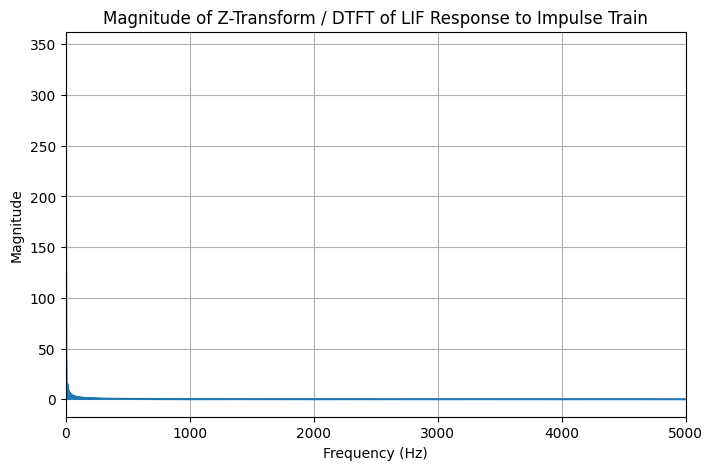


Note: Plotting the full Z-transform in the complex z-plane is not standard for visualizing the frequency content of a signal.
This plot shows the magnitude of the Discrete-Time Fourier Transform (DTFT), which is the Z-transform evaluated on the unit circle.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Assuming 'v_impulse_train' and 'dt' are available from previous cells
# If not, you would need to recalculate them or load them here.

# Calculate the frequency response from the Z-transform (using freqz)
# freqz computes the frequency response of a digital filter, which is related to the Z-transform
# We are essentially looking at the DTFT of the impulse response.
# The 'b' and 'a' parameters for freqz are the numerator and denominator coefficients of the filter's transfer function in the z-domain.
# For a simple impulse response (like v_impulse_train), we can treat it as the impulse response of a filter.
# So, the numerator coefficients 'b' are the values of v_impulse_train, and the denominator 'a' is just [1].

b = v_impulse_train
a = [1]

# Calculate the frequency response
# worN specifies the frequencies at which to evaluate the response.
# We'll use a sufficient number of points for a smooth plot.
w, h = freqz(b, a, worN=np.linspace(0, np.pi, 1000))

# Convert angular frequency (radians/sample) to Hz
frequencies_z = w * (0.5 / np.pi) * (1/dt) # Convert from radians/sample to Hz

# Plot the magnitude response
plt.figure(figsize=(8, 5))
plt.plot(frequencies_z, np.abs(h))
plt.title("Magnitude of Z-Transform / DTFT of LIF Response to Impulse Train")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.xlim([0, 1/(2*dt)]) # Limit to Nyquist frequency
plt.show()

print("\nNote: Plotting the full Z-transform in the complex z-plane is not standard for visualizing the frequency content of a signal.")
print("This plot shows the magnitude of the Discrete-Time Fourier Transform (DTFT), which is the Z-transform evaluated on the unit circle.")

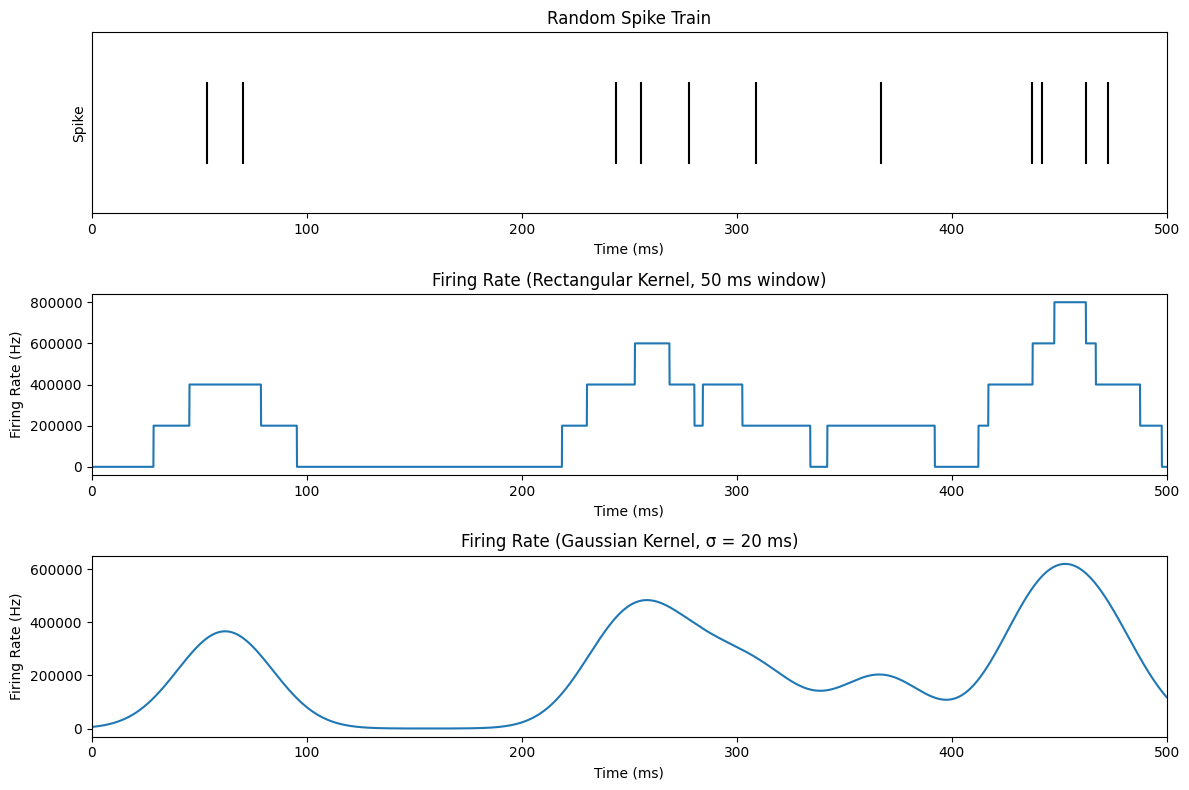

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Assuming 't' and 'dt' are available from previous cells
# If not, you would need to recalculate them here:
dt = 1e-4           # Time step (s)
T = 0.5             # Total time (s)
t = np.arange(0, T, dt)

# -------------------------------
# Random Spike Train Generation
# -------------------------------

# Generate a random spike train (e.g., Poisson-like)
# Let's assume an average firing rate (e.g., 20 Hz) for the random train
average_rate = 20 # Hz
probability_of_spike = average_rate * dt # Probability of a spike in a small time bin

# Create a random array and set spike times where random value is less than probability
random_spike_train = np.random.rand(len(t)) < probability_of_spike
random_spike_train = random_spike_train.astype(float) # Convert boolean to float (0s and 1s)

# -------------------------------
# Firing Rate Calculation
# -------------------------------

# Define kernels for convolution
# Rectangular kernel
rect_kernel_size_ms = 50 # milliseconds
rect_kernel_size_bins = int(rect_kernel_size_ms * 1e-3 / dt)
# Create a rectangular kernel with sum normalized to 1 for proper rate estimation
rect_kernel = np.ones(rect_kernel_size_bins) / (rect_kernel_size_bins * dt)

# Gaussian kernel
gaussian_sigma_ms = 20 # milliseconds
gaussian_sigma_bins = gaussian_sigma_ms * 1e-3 / dt
# Create a Gaussian kernel
# The size of the Gaussian window should be large enough to capture the kernel
# We'll use 5 times the standard deviation on each side as a common practice
gaussian_window_bins = int(gaussian_sigma_bins * 5)
gaussian_kernel = np.exp(-0.5 * (np.arange(-gaussian_window_bins, gaussian_window_bins+1) / gaussian_sigma_bins)**2)
# Normalize the Gaussian kernel so its integral is 1 for rate estimation
gaussian_kernel /= np.sum(gaussian_kernel * dt)


# Convolve the spike train with the kernels to get firing rate
firing_rate_rect = np.convolve(random_spike_train, rect_kernel, mode='same') * (1/dt) # Multiply by 1/dt to convert from count to rate
firing_rate_gaussian = np.convolve(random_spike_train, gaussian_kernel, mode='same') * (1/dt) # Multiply by 1/dt to convert from count to rate

# Alternatively, using scipy's gaussian_filter1d which handles convolution efficiently
# firing_rate_gaussian_scipy = gaussian_filter1d(random_spike_train.astype(float), sigma=gaussian_sigma_bins, mode='nearest') * (1/dt)
# Note: scipy's filter is typically normalized differently, often to sum=1. Need to adjust for rate.
# Let's stick with the manual convolution and normalized kernel for clarity regarding rate units.

# -------------------------------
# Plotting
# -------------------------------

plt.figure(figsize=(12, 8))

# Plot the original random spike train
plt.subplot(3, 1, 1)
# To visualize spikes, we can plot a line at the time of each spike
spike_times_random = t[random_spike_train > 0.5] # Get times where spike_train is approximately 1
plt.eventplot(spike_times_random * 1e3, lineoffsets=1, linelengths=0.5, color='k')
plt.title("Random Spike Train")
plt.xlabel("Time (ms)")
plt.ylabel("Spike")
plt.yticks([]) # Hide y-axis ticks as it's a binary event plot
plt.xlim([0, T*1e3])


# Plot firing rate with rectangular kernel
plt.subplot(3, 1, 2)
plt.plot(t*1e3, firing_rate_rect)
plt.title(f"Firing Rate (Rectangular Kernel, {rect_kernel_size_ms} ms window)")
plt.xlabel("Time (ms)")
plt.ylabel("Firing Rate (Hz)")
plt.xlim([0, T*1e3])


# Plot firing rate with Gaussian kernel
plt.subplot(3, 1, 3)
plt.plot(t*1e3, firing_rate_gaussian)
plt.title(f"Firing Rate (Gaussian Kernel, σ = {gaussian_sigma_ms} ms)")
plt.xlabel("Time (ms)")
plt.ylabel("Firing Rate (Hz)")
plt.xlim([0, T*1e3])


plt.tight_layout()
plt.show()